# **Batch Gradient Descent Regression Model for Random Data**

This Jupyter Notebook creates a random linear dataset with Gaussian noise added to the following equation: y = 5 + 2X<sub>1</sub>. It employs the [numpy.random.rand()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) function from the [NumPy](https://numpy.org/) library to add random noise to the linear data. Then, this Jupyter Notebook uses the Batch Gradient Descent method to
build a regression model for this toy dataset. The following code is similar to Jupyter Notebooks discussed by [Géron, 2023](https://www.isbns.net/isbn/9781098125974/). It evaluates the regression model's predictive performance using metrics recommended by [Walsh et al., 2021](https://doi.org/10.1038/s41592-021-01205-4) and [de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449).
<br> </br>
<img src="https://drive.usercontent.google.com/download?id=1HttLaxOndVqcJqh3mA3-IYvi6E1yUVKu&export=view&authuser=0" width=520 alt="Dice">
<br><i>This image shows dice as an analogy of random data. Source: Pixabay: https://pixabay.com/illustrations/beaker-dices-cubes-play-random-3261101/</i></br>
<br> </br>
**References**
<br></br>
De Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,
Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of machine-learning models to explore the scoring function space. J Comput Chem. 2024; 45(27): 2333-2346.
PMID: 38900052. [DOI: 10.1002/jcc.27449](https://doi.org/10.1002/jcc.27449) [PubMed](https://pubmed.ncbi.nlm.nih.gov/38900052/)
<br></br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023.
[ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br></br>
Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME: recommendations for supervised machine learning validation in biology. Nat Methods. 2021; 18(10): 1122-1127. [DOI: 10.1038/s41592-021-01205-4](https://doi.org/10.1038/s41592-021-01205-4) [PubMed](https://pubmed.ncbi.nlm.nih.gov/34316068/)
<br> </br>
It follows the code.


Generating and plotting random linear data......
Determining metrics...done!
Output log file: random_data_metrics.log

Regression model generated with batch gradient descent method
Dataset: Randomly Generated Linear Dataset (y = 5 + 2X$_1$)
Target variable: y
Attribute (independent variable): X
Number of instances: 100
Regression model: y =                                        5.50622115 + 1.97442538*X
Standard error (theta0) = 0.05823133
Standard error (theta1) = 0.02493682
RSS = 8.63880580
r = 0.99227424		p-value = 1.21828e-90
rho = 0.98880288	p-value = 8.85555e-83
MSE = 0.08638806
RMSE = 0.29391845
MAE = 0.26119517
R2 = 0.98460817
DOME = 0.39350716
EDOMEr2 = 0.39380807
EDOMErho = 0.39413676
EDOME = 0.39396722

Metrics defined in the following references:
de Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of machine-learning model

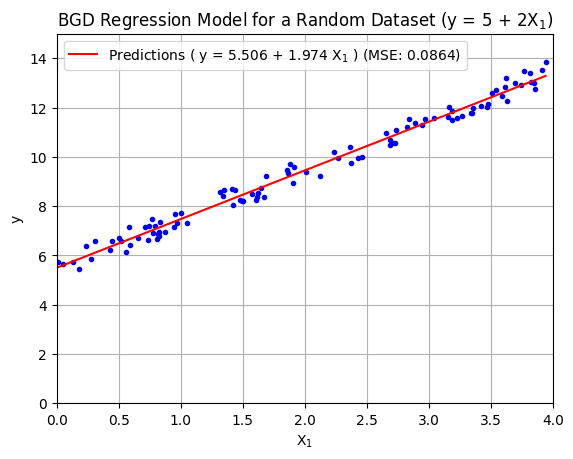

done!
Output scatter plot file: BGDRegressor_model_scatter_plot.pdf


Generating contour plot...

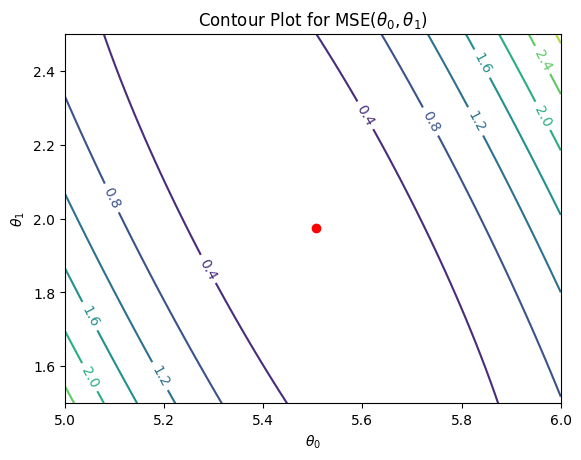

done!
Output contour plot file: BGDRegressor_contour_plot.pdf


Generating 3D-surface plot...

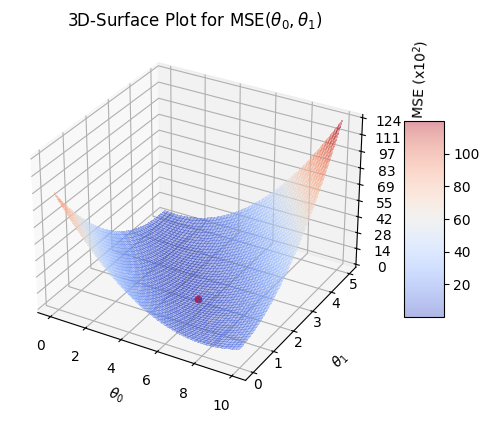

done!
Output 3D-surface plot file: BGDRegressor_3d_surface_plot.png


Writing predicted values for y...done!
Output csv file: BGDRegressor_predicted_values.csv



<Figure size 640x480 with 0 Axes>

In [ ]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# July 20, 2024                                                                #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import urllib.request
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import csv
from scipy import stats
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import add_dummy_feature

# Define BGDRegressor() function
def BGDRegressor(eta,max_iter,X_b,y,random_seed,theta_rows,theta_cols):
    """Function to calculate the batch gradient descent regression model"""

    # randomly initialized model parameters
    np.random.seed(random_seed)
    theta = np.random.randn(theta_rows,theta_cols)

    # Get m
    m = len(X_b)

    # Looping through epochs
    for epoch in range(max_iter):
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients

    # Return model
    return theta

################################################################################
# Toy Dataset (Random Dataset for y = 5 + 2X1 + Gaussian Noise)                #
# Géron, Aurélien. 2023. Hands-on Machine Learning with Scikit-Learn, Keras,   #
# and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems.#
# 3rd ed. CA 95472: O’Reilly.                                                  #
################################################################################
# Parameters for this dataset
file_in = "random_data.csv"
dataset_title = "Randomly Generated Linear Dataset (y = 5 + 2X$_1$)"
target_label = "y"              # Define header for column with target data
attribute_label = "X"           # Define header for colums with attribute data

# Scatter plot
plt_scatter_X_min,plt_scatter_X_max,plt_scatter_y_min,plt_scatter_y_max = \
                0,4,0,15                    # Limits to define plotting
plt_scatter_X_label_str,plt_scatter_y_label_str = \
                        "X$_1$","y"         # Define labels for X and y axes
plt_scatter_title_str = "BGD Regression Model for a Random Dataset "
plt_scatter_title_str += "(y = 5 + 2X$_1$)"
                                            # Plot title

# Contour plot
plt_countour_n_points = 100
plt_contour_t0_array = [5.0,6.0]            # Limits to define plotting
plt_contour_t1_array = [1.5,2.5]            # [theta_min,theta_max]
plt_contour_t0_factor = 1.0                 # Scaling to make nice plots
plt_contour_t1_factor = 1.0                 # Scaling to make nice plots
plt_contour_t0_label = "$\\theta_{0}$"      # Theta0 axis label
plt_contour_t1_label =\
            "$\\theta_{1}$"                 # Theta1 axis label
plt_contour_title =\
            "Contour Plot for MSE($\\theta_{0},\\theta_{1}$)"   # Plot title

# 3D-surface plot
plt_3d_n_points = 1000                      # Number of points for 3D-plotting
plt_3d_t0_array = [0,10,0.01]               # Limits to define plotting
plt_3d_t1_array = [0,5,0.005]               # [theta_min,theta_max,step]
plt_3d_t0_factor = 1.0                      # Scaling to make nice plots
plt_3d_t1_factor = 1.0                      # Scaling to make nice plots
plt_3d_rss_factor = 1e-2                    # Scaling to make nice plots
plt_3d_t0_label = "$\\theta_{0}$"           # Theta0 axis label
plt_3d_t1_label = \
            "$\\theta_{1}$"                 # Theta1 axis label
plt_3d_z_label = \
            "\t\t\t\t\t\tMSE (x10$^2$)"     # Z axis label
plt_3d_tick_params_axis = "y"               # Define axis for moving tick marks
plt_3d_tick_params_pad = -5                 # Define pad for moving tick marks
plt_3d_tick_params_rot = 0                  # Define rotation for tick marks
plt_3d_title = "3D-Surface Plot for MSE($\\theta_{0},\\theta_{1}$)" # Plot title

################################################################################
# Randomly generated linear dataset                                            #
################################################################################
msg_out = "\nGenerating and plotting random linear data..."
print(msg_out,end="...")
np.random.seed(1123581321)          # Set up a random seed
X = 4*np.random.rand(100,1)
y = 5 + np.random.rand(100,1) + 2*X
X_b = np.c_[np.ones((100,1)), X]    # Add x0 = 1 to each instance
X_3d = X

# Call BGDRegressor() function
theta_best = BGDRegressor(0.1,1000,X_b,y,42,2,1)

################################################################################
# Make predictions                                                             #
################################################################################
X_new = np.array([[0],[2]])                        # Set up an array
X_new_b = add_dummy_feature(X_new)                 # Add x0 = 1 to each instance
y_pred = X_new_b @ theta_best
y_predictions = theta_best[0][0] + X_3d*theta_best[1][0]
y = y.reshape(len(y),)
X_array = np.array([[X.min()],[X.max()]])
y_linear = theta_best[0][0] + theta_best[1][0]*X_array

################################################################################
# Determine metrics                                                            #
################################################################################
print("\nDetermining metrics",end="...")
file_metrics = file_in.replace(".csv","_metrics.log")
fo_metrics = open(file_metrics,"w")
X_bar = X.mean()
y_bar = y.mean()
n = len(y)
y_pred = y_predictions.reshape(len(y_predictions),)
rss_min = np.sum( np.square(y_pred - y) )
mse = (np.sum( (y - y_pred)**2 ))/n
rmse =  np.sqrt(mse)
mae = median_absolute_error(y,y_pred)
ss_res = np.sum( (y - y_pred)**2 )
ss_tot = np.sum( (y - y_bar)**2 )
R2 = 1 - ss_res/ss_tot

# Standard error as defined in James, G., Witten, D., Hastie, T., & Tibshirani,
# R. 2021. An introduction to statistical learning: With applications in R
# (2nd ed.). Springer.
s2 = rss_min/(n - 2)
se_theta0_2 = s2*(1/n + (X_bar**2)/np.sum( (X - X_bar)**2)  )
se_theta1_2 = s2/np.sum( (X - X_bar)**2)
se_theta0,se_theta1 = np.sqrt(se_theta0_2),np.sqrt(se_theta1_2)
r_pearson,p_pearson = stats.pearsonr(y,y_pred)
rho,p_spearman = stats.spearmanr(y,y_pred)
dome = np.sqrt(rmse**2 + mae**2 + (R2 -1)**2 )
edomer2 = np.sqrt(rmse**2 + mae**2 + (R2 -1)**2 + (r_pearson**2 - 1)**2)
edomerho = np.sqrt(rmse**2 + mae**2 + (R2 -1)**2 + (rho**2 - 1)**2)
edome = np.sqrt(rmse**2 + mae**2+(R2-1)**2 +(r_pearson**2-1)**2 +(rho-1)**2)
metrics_out = "Regression model generated with batch gradient descent method"
metrics_out += "\nDataset: "+dataset_title
metrics_out += "\nTarget variable: "+target_label
metrics_out += "\nAttribute (independent variable): "+attribute_label
metrics_out += "\nNumber of instances: "+str(n)
metrics_out += "\nRegression model: "+target_label+" =\
                                        {:.8f}".format(float(theta_best[0][0]))
metrics_out += " + {:.8f}*".format(theta_best[1][0])+attribute_label
metrics_out += "\nStandard error (theta0) = {:.8f}".format(se_theta0)
metrics_out += "\nStandard error (theta1) = {:.8f}".format(se_theta1)
metrics_out += "\nRSS = {:.8f}".format(rss_min)
metrics_out +="\nr = {:.8f}".format(r_pearson)
metrics_out += "\t\tp-value = {:.5e}".format(p_pearson)
metrics_out += "\nrho = {:.8f}".format(rho)
metrics_out += "\tp-value = {:.5e}".format(p_spearman)
metrics_out += "\nMSE = {:.8f}".format(mse)
metrics_out += "\nRMSE = {:.8f}".format(rmse)
metrics_out += "\nMAE = {:.8f}".format(mae)
metrics_out += "\nR2 = {:.8f}".format(R2)
metrics_out += "\nDOME = {:.8f}".format(dome)
metrics_out += "\nEDOMEr2 = {:.8f}".format(edomer2)
metrics_out += "\nEDOMErho = {:.8f}".format(edomerho)
metrics_out += "\nEDOME = {:.8f}".format(edome)
metrics_out += "\n\nMetrics defined in the following references:"
metrics_out += "\nde Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF,"
metrics_out += "Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR,"
metrics_out += " Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. "
metrics_out += "SAnDReS 2.0: Development of machine-learning models to explore "
metrics_out += " the scoring function space. J Comput Chem. 2024 Oct 15;45(27):"
metrics_out += "2333-2346. doi: 10.1002/jcc.27449. Epub ahead of print. "
metrics_out += "PMID: 38900052.\n"
metrics_out += "\nWalsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; "
metrics_out += "ELIXIR Machine Learning Focus Group, Harrow J, Psomopoulos FE, "
metrics_out += "Tosatto SCE. DOME: recommendations for supervised machine "
metrics_out += "learning validation in biology. Nat Methods. 2021, 18(10), "
metrics_out += "1122-1127. doi: 10.1038/s41592-021-01205-4\n"
fo_metrics.write(metrics_out)
fo_metrics.close()
print("done!")
msg_out = "Output log file: "+file_metrics
print(msg_out+"\n")
print(metrics_out)

################################################################################
# Set up plot parameters to generate a scatter plot                            #
################################################################################
print("\nGenerating scatter plot",end="...")
theta0_str = "{:.3f}".format(theta_best[0][0])
theta1_str = "{:.3f}".format(theta_best[1][0])
plt_label_str = "Predictions ( y = "+theta0_str+" + "+theta1_str+" X$_1$ ) "
plt_label_str += "(MSE: {:.4f})".format(mse)
plt_str_1 = "b."
plt_str_2 = "r-"
plt_axis_array = [plt_scatter_X_min,plt_scatter_X_max,plt_scatter_y_min,
                                                            plt_scatter_y_max]
plt_legend_loc = "upper left"
plt_grid_boolean = True
plt_scatter_file = "BGDRegressor_model_scatter_plot.pdf"
plt_dpi = 1500

# Generate scatter plot
plt.plot(X, y,plt_str_1)                        # Experimental data
plt.plot(X_array,y_linear,plt_str_2,
label=plt_label_str)                            # Predictions
plt.axis(plt_axis_array)                        # Limits of axis
plt.xlabel(plt_scatter_X_label_str)             # X label
plt.ylabel(plt_scatter_y_label_str)             # y label
plt.legend(loc = plt_legend_loc)                # Legend location
plt.grid(visible = plt_grid_boolean)            # Add grid to plot
plt.title(plt_scatter_title_str)                # Plot title
plt.show()                                     # Show plot
plt.savefig(plt_scatter_file,dpi=plt_dpi)       # Save plot
plt.close()
print("done!")
msg_out = "Output scatter plot file: "+plt_scatter_file
print(msg_out+"\n")

################################################################################
# Set up plot parameters to generate a contour plot                            #
################################################################################
print("\nGenerating contour plot",end="...")
plt_contour_file = "BGDRegressor_contour_plot.pdf"
t0 = np.linspace(plt_contour_t0_array[0],plt_contour_t0_array[1],
                                                    plt_countour_n_points)
t1 = np.linspace(plt_contour_t1_array[0],plt_contour_t1_array[1],
                                                    plt_countour_n_points)

mse = []
y4rss = y.reshape(len(y),1)
for i in range(len(t0)):
    for j in range(len(t1)):
        y_full_predictions = t0[i] + t1[j]*X_3d
        rss_value = np.sum( np.square(y_full_predictions - y4rss)   )
        mse.append(rss_value/n)

# Generate contour plot
X, Y = np.meshgrid(t0,t1)                       # Return a tuple of coordinate
                                                # matrices from coordinate
                                                # vectors
Z = np.array(mse)                               # Generate a NumPy array
Z = Z.reshape(plt_countour_n_points,
                    plt_countour_n_points)      # Reshape array
fig, ax = plt.subplots()                        # Set up plot
CS = ax.contour(X*plt_contour_t0_factor,
Y*plt_contour_t1_factor,Z)                      # Set up contour plot
ax.scatter(theta_best[0][0],theta_best[1][0]*plt_contour_t1_factor,marker="o",
                                        c="r")  # Minimum of MSE
ax.clabel(CS, inline=True, fontsize=10)         # Define font size
ax.set_xlabel(plt_contour_t0_label)             # X label
ax.set_ylabel(plt_contour_t1_label)             # y label
ax.set_title(plt_contour_title)                 # Plot title
plt.show()                                     # Show plot
plt.savefig(plt_contour_file,dpi=plt_dpi)       # Save plot
plt.close()
print("done!")
msg_out = "Output contour plot file: "+plt_contour_file
print(msg_out+"\n")

################################################################################
# Set up plot parameters for 3D-surface plot                                   #
################################################################################
print("\nGenerating 3D-surface plot",end="...")
plt_3d_surface_file = "BGDRegressor_3d_surface_plot.png"
t0 = np.arange(plt_3d_t0_array[0],plt_3d_t0_array[1],plt_3d_t0_array[2])
t1 = np.arange(plt_3d_t1_array[0],plt_3d_t1_array[1],plt_3d_t1_array[2])
mse = []
for i in range(len(t0)):
    for j in range(len(t1)):
        y_full_predictions = t0[i] + t1[j]*X_3d
        rss_value = np.sum( np.square(y_full_predictions - y4rss)   )
        mse.append(rss_value/n)

# Generate 3D-surface plot
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
X, Y = np.meshgrid(t0*plt_3d_t0_factor,
                t1*plt_3d_t1_factor)            # Return a tuple of coordinate
                                                # matrices from coordinate
                                                # vectors
fig, ax = \
plt.subplots(subplot_kw={"projection": "3d"})   # Set up plot
Z = np.array(mse)
Z = Z.reshape(plt_3d_n_points,
            plt_3d_n_points)  # Reshape array
ax.scatter(theta_best[0]*plt_3d_t0_factor,theta_best[1]*plt_3d_t1_factor,
                rss_min/n, marker="o", c="r") # Minimum of MSE
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4,linewidth=0,
                            antialiased=False)  # Generate surface plot

# Customize axes
ax.set_zlim(Z.min(), Z.max())
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter("{x:.0f}")
ax.set_xlabel(plt_3d_t0_label)
ax.set_ylabel(plt_3d_t1_label)
ax.tick_params(axis=plt_3d_tick_params_axis,pad=plt_3d_tick_params_pad,
        rotation=plt_3d_tick_params_rot)        # Define moving data for tick
                                                # marks
ax.set_zlabel(plt_3d_z_label)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.53, aspect=5)        # Set up colorbar
ax.set_title(plt_3d_title)                      # Plot title
plt.show()                                      # Show plot
plt.savefig(plt_3d_surface_file,
    dpi=plt_dpi)                                # Save plot
print("done!")
msg_out = "Output 3D-surface plot file: "+plt_3d_surface_file
print(msg_out+"\n")

################################################################################
# Write predicted values                                                       #
################################################################################
print("\nWriting predicted values for "+target_label,end="...")
file_predicted_values = "BGDRegressor_predicted_values.csv"
fo_out = open(file_predicted_values,"w")
data_out = attribute_label+","+target_label+","+target_label+"(predicted)"+"\n"
for i,line in enumerate(y_pred):
    data_out += str(X_3d[i][0])+","+str(y[i])+","+str(y_pred[i])+"\n"
fo_out.write(data_out)
fo_out.close()
print("done!")
msg_out = "Output csv file: "+file_predicted_values
print(msg_out+"\n")
################################################################################